### Importando bibliotecas necessárias

In [93]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import re

### Baixar arquivos:

In [94]:
"""
url = 'https://files.grouplens.org/datasets/movielens/ml-1m.zip'

try:
    response = requests.get(url, verify=False)
    with open('ml-1m.zip', 'wb') as file:
        file.write(response.content)
    print("Download concluído com sucesso!")
except requests.exceptions.RequestException as e:
    print(f"Erro ao baixar o arquivo: {e}")

"""

'\nurl = \'https://files.grouplens.org/datasets/movielens/ml-1m.zip\'\n\ntry:\n    response = requests.get(url, verify=False)\n    with open(\'ml-1m.zip\', \'wb\') as file:\n        file.write(response.content)\n    print("Download concluído com sucesso!")\nexcept requests.exceptions.RequestException as e:\n    print(f"Erro ao baixar o arquivo: {e}")\n\n'

In [95]:
"""
url = 'https://files.grouplens.org/datasets/movielens/ml-1m-README.txt'

try:
    response = requests.get(url, verify=False)
    with open('ml-1m.zip', 'wb') as file:
        file.write(response.content)
    print("Download concluído com sucesso!")
except requests.exceptions.RequestException as e:
    print(f"Erro ao baixar o arquivo: {e}")
"""

'\nurl = \'https://files.grouplens.org/datasets/movielens/ml-1m-README.txt\'\n\ntry:\n    response = requests.get(url, verify=False)\n    with open(\'ml-1m.zip\', \'wb\') as file:\n        file.write(response.content)\n    print("Download concluído com sucesso!")\nexcept requests.exceptions.RequestException as e:\n    print(f"Erro ao baixar o arquivo: {e}")\n'

In [96]:
# Lendo o arquivo movies.dat
filepath_movies = os.path.join('data/ml-1m', 'movies.dat')
filepath_ratings = os.path.join('data/ml-1m', 'ratings.dat')
filepath_users  = os.path.join ('data/ml-1m', 'users.dat')

df_movies = pd.read_csv(
    filepath_movies,
    delimiter='::',
    engine='python',
    names=['MovieID', 'Title', 'Genres'],
    encoding='latin1'
)

# Lendo o arquivo ratings.dat
df_ratings = pd.read_csv(
    filepath_ratings,
    delimiter='::',
    engine='python',
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
    encoding='latin1'
)

# Lendo o arquivo users.dat
df_users = pd.read_csv(
    filepath_users,
    delimiter='::',
    engine='python',
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='latin1'
)

print(df_movies.head())
print(df_ratings.head())
print(df_users.head())


   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


### Faremos agora uma análise exploratória dos dados

In [97]:
print(df_movies.shape)
print(df_ratings.shape)
print(df_users.shape)

(3883, 3)
(1000209, 4)
(6040, 5)


##### 3883 filmes 1000209 avaliações e 6040 usuários

In [98]:
null_counts = df_movies.isnull().sum()
print("Valores nulos por coluna:\n", null_counts)

Valores nulos por coluna:
 MovieID    0
Title      0
Genres     0
dtype: int64


In [99]:
null_counts = df_ratings.isnull().sum()
print("Valores nulos por coluna:\n", null_counts)

Valores nulos por coluna:
 UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


In [100]:
null_counts = df_users.isnull().sum()
print("Valores nulos por coluna:\n", null_counts)

Valores nulos por coluna:
 UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


Nenhum valor nulo

Para facilitar vamos tirar o ano do filme do nome, e por em uma nova coluna

In [101]:
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return int(match.group(1))
    return None

df_movies['Year'] = df_movies['Title'].apply(extract_year)
print(df_movies.head())

   MovieID                               Title                        Genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   

   Year  
0  1995  
1  1995  
2  1995  
3  1995  
4  1995  


##### Vamos fazer um gráfico de quantidade de filmes x ano

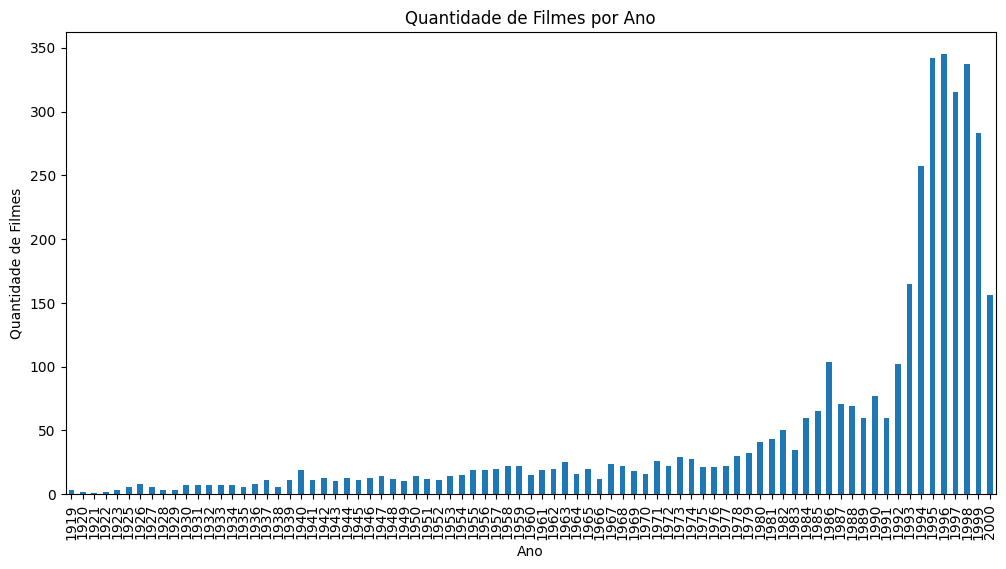

In [102]:
movies_per_year = df_movies['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.title('Quantidade de Filmes por Ano')
plt.show()


##### Podemos ver que a gigante maioria dos filmes é da década de 90

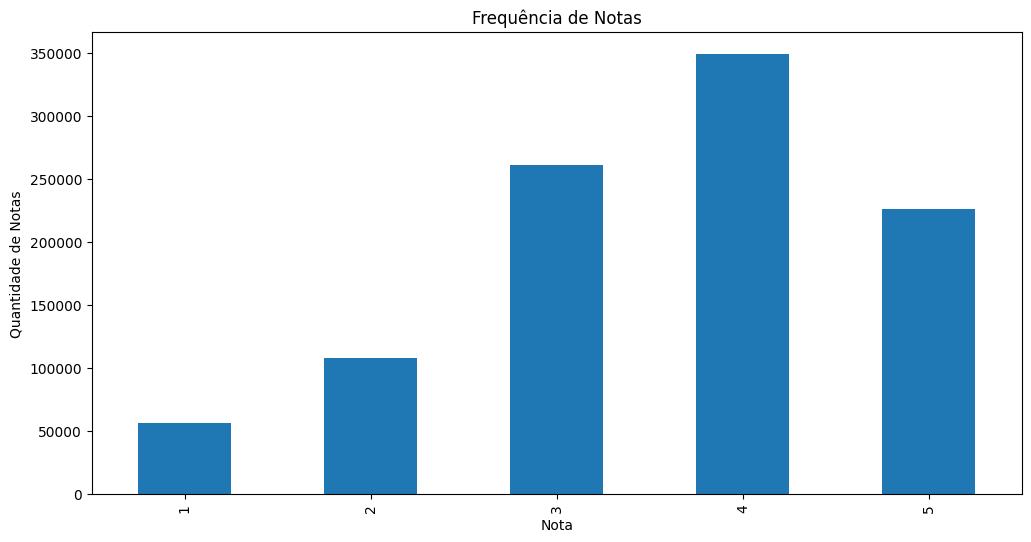

In [103]:
ratings = df_ratings['Rating'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
ratings.plot(kind='bar')
plt.xlabel('Nota')
plt.ylabel('Quantidade de Notas')
plt.title('Frequência de Notas')
plt.show()

##### Pouquíssimas notas baixas!